## Create a timeseries over an area
#### Author: Rishi Anand

In [1]:
import xarray as xr
import requests
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3fs
import rioxarray

In [2]:
# Initialize the s3 filesystem
s3 = s3fs.S3FileSystem({'anon':True})
# Select the months to create a timeseries for
months = ['201501']
# CAUTION: The s3fs does not like the clipping instruction and fails often.
# If you want to create a timeseries for more than one or two months, consider saving
# datapoints after each day finishes averaging and putting the runs together manually.

In [3]:
# Clip the file to a bounding box
# Format of [Min Long, Min Lat, Max Long, Max Lat]
coordsMD = [
    -81.53,37.61,-74.73,40.09
]

In [4]:
# datapoints is the list of values and y-axis
datapoints = []
# dates stores the date values for each point, and will label the x-axis
dates = []
# Select the variable of interest
var = 'Tair'
# CAUTION: This loop will often fail and hang without an error.
# If this happens, simply try again - high s3 traffic will lead to this issue.
for month in months:
    files = s3.ls('nasa-waterinsight/NLDAS3/forcing/hourly/'+month+'/')
    for file in files:
        s3 = s3fs.S3FileSystem({'anon':True})
        with s3.open(file) as infile:
            date = file[-20:-12]
            print('Opening', date)
            orig = xr.open_dataset(infile, engine="h5netcdf")
            ds = orig.copy(deep=True)
            ds.rio.write_crs(4326, inplace=True)
            print('Clipping', date)
            da = ds[var].rio.clip_box(*coordsMD)
            dates.append(date)
            datapoints.append(np.nanmean(da.isel(time=0).to_numpy()))
            print('Closing', date, datapoints)
            infile.close()

Opening 20150101
Clipping 20150101
Closing 20150101 [268.75702]
Opening 20150102
Clipping 20150102
Closing 20150102 [268.75702, 272.68387]
Opening 20150103
Clipping 20150103
Closing 20150103 [268.75702, 272.68387, 273.2522]
Opening 20150104
Clipping 20150104
Closing 20150104 [268.75702, 272.68387, 273.2522, 277.3607]
Opening 20150105
Clipping 20150105
Closing 20150105 [268.75702, 272.68387, 273.2522, 277.3607, 281.65387]
Opening 20150106
Clipping 20150106
Closing 20150106 [268.75702, 272.68387, 273.2522, 277.3607, 281.65387, 267.72925]
Opening 20150107
Clipping 20150107
Closing 20150107 [268.75702, 272.68387, 273.2522, 277.3607, 281.65387, 267.72925, 268.04153]
Opening 20150108
Clipping 20150108
Closing 20150108 [268.75702, 272.68387, 273.2522, 277.3607, 281.65387, 267.72925, 268.04153, 262.1573]
Opening 20150109
Clipping 20150109
Closing 20150109 [268.75702, 272.68387, 273.2522, 277.3607, 281.65387, 267.72925, 268.04153, 262.1573, 264.36368]
Opening 20150110
Clipping 20150110
Closing 

In [5]:
datapoints

[268.75702,
 272.68387,
 273.2522,
 277.3607,
 281.65387,
 267.72925,
 268.04153,
 262.1573,
 264.36368,
 267.00113,
 264.29364,
 272.70358,
 274.08066,
 267.96677,
 269.8942,
 270.0925,
 271.40646,
 272.7995,
 273.91702,
 274.04813,
 273.5153,
 272.16418,
 271.62497,
 273.17273,
 271.61758,
 274.4198,
 269.86594,
 268.1992,
 265.7702,
 273.62512,
 265.92636]

Text(0, 0.5, 'Air Temp. (K)')

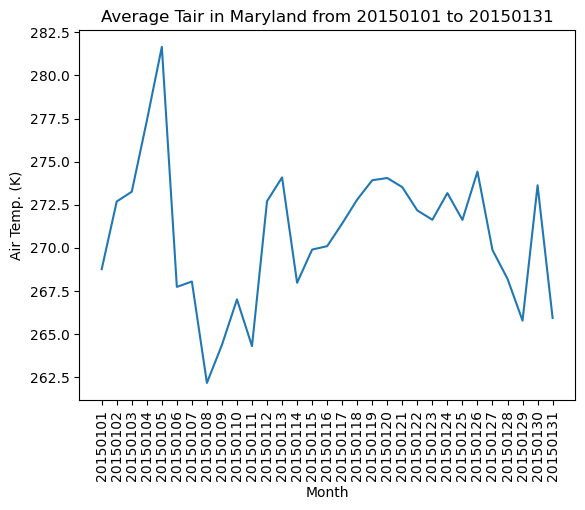

In [6]:
plt.plot(dates, datapoints)
plt.title('Average ' + var + ' in Maryland from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Air Temp. (K)')